# Salifort Motors Case Study with Python

### Salifort Motors - Employee Retention Project

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.        

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They have the following question: what’s likely to make the employee leave the company?

Objective: Analyze the data collected by the HR department and build a model that predicts whether or not an employee will leave the company.

## PACE Stage: Plan

## Step 1. Imports

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

To clean the data, I will standarize the column names as needed and fix any spelling mistakes.

In [6]:
# Rename columns
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values in the data
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

In [8]:
# Check for duplicate entries in the data
df0.duplicated().sum()

3008

Duplicates were found in 3008 rows. That is approximately 20% of the data.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The previous output shows the first five ocurrences of rows that are duplicated further down in the dataframe. Given the improbability of several continuous variables extending across 10 columns, I will drop them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Checking data for outliers.

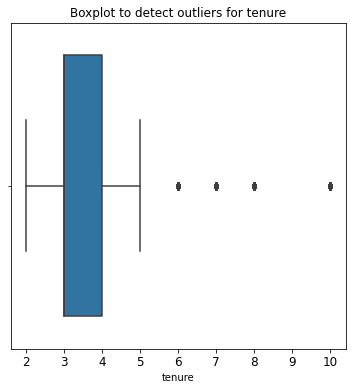

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows outliers in the `tenure` variable.

In [12]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


## PACE Stage: Analyze

## Step 2. Data Exploration

In [13]:
# Numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

In this section, I will explore the variables of interest and generate plots to visualize relationships within the dataset.

I will begin by creating a boxplot showing `average_monthly_hours` distributions for `number_project`, comparing between employees who stayed and left.

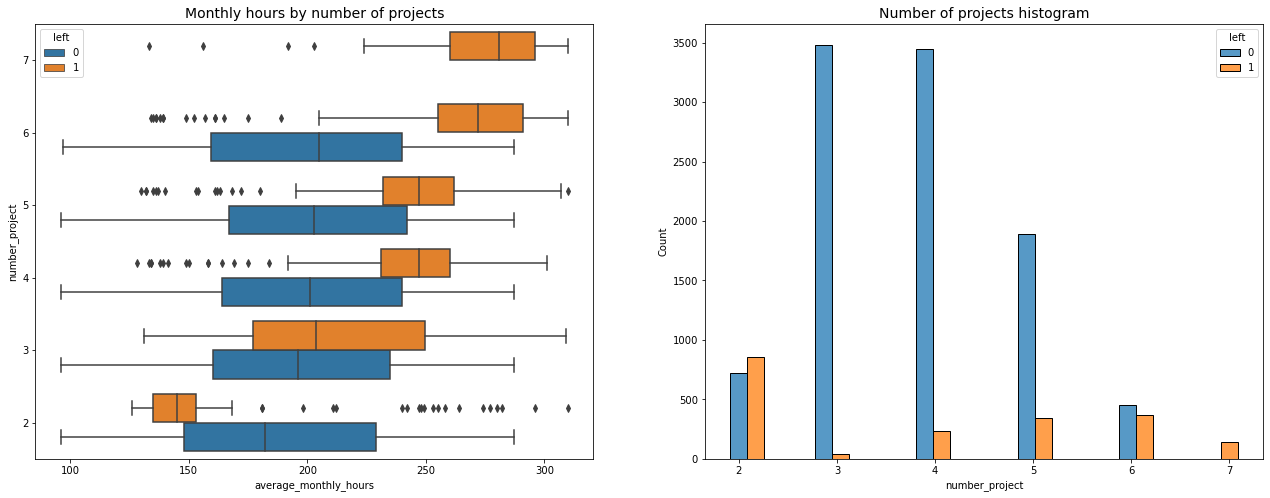

In [14]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot showing `average_monthly_hours` distributions for `number_project`, comparing between employees who stayed and left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histogram showing distribution of `number_project`, comparing between employees who stayed and left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

Comparing the distributions of employees who stayed against those who left using a stacked boxplot. The following stand out from the plot:

1. It reveals that there is a big gap between the employees who left the company. They either worked less hours than their peers who had the same number of projects or significantly more. Those who worked considerably less might have been fired. On the other hand, people who worked much more might have quit due to overwork.

2. Every employee who worked on seven projects left the company. Among those who worked on 6 and 7 projects, the interquartile range was between 250-300 hrs/month, higher than any other group. Assuming a standard 40-hour work week, without considering vacations days, the average monthly work hours for a weekday employee is 52 weeks mutiplied by 40 hrs/week divided by 12 months, resulting in 173.33 hrs/month. This suggests that most employees are overworked.

3. The ideal number of projects for employees appears to be 3-4, as indicated by a lower turnover ratio between those who left and those who stayed.


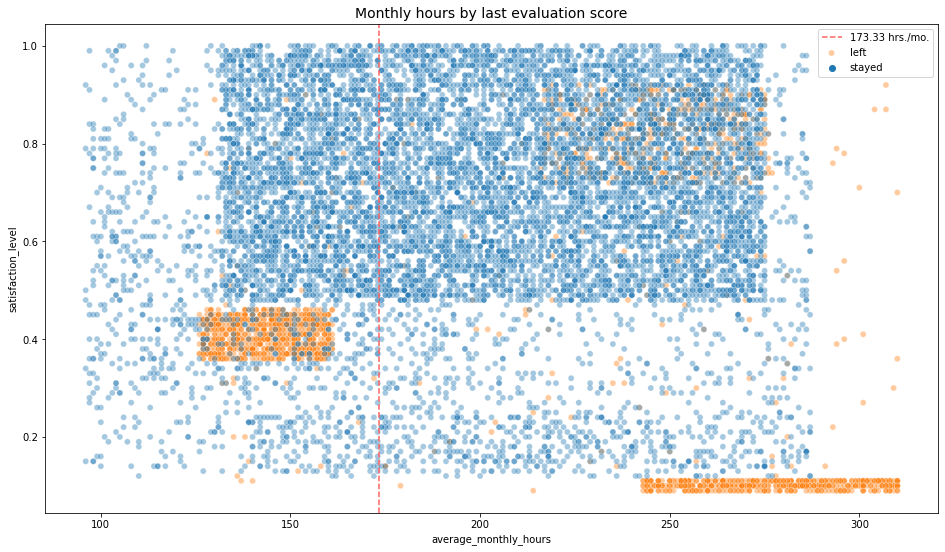

In [15]:
# Create scatterplot of `average_monthly_hours` vs. `satisfaction_level`, comparing between employees who stayed and left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=173.33, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['173.33 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot further shows the correlation between higher work hours and employees leaving the company, particularly for those working approximately between 240 and 315 hours per month. Additionally, their satisfaction levels are the lowest, with values close to 0. 

The plot also depicts another group of people who left the company, as mentioned in the previous stacked boxplot. These individuals had better work hours, less than the average monthly work hours for an employee working weekdays consisting of 173.33 hours per month. However, their satisfaction levels are notably low with a value hovering around 0.4. It is difficult to know the real reason why they might have left.

A third group of employees who left the company who worked approximately 220 to 275 hours per month, with their satisfaction level ranging from around 0.7 to 0.9.

It is important to highlights the irregular shape observed in the scatterplot's data distribution, suggesting potential data manipulation.

Next, I will create a boxplot to visualize the distribution of `satisfaction level` in relation to `tenure`, as well as a histogram to depict the distribution of `tenure`.

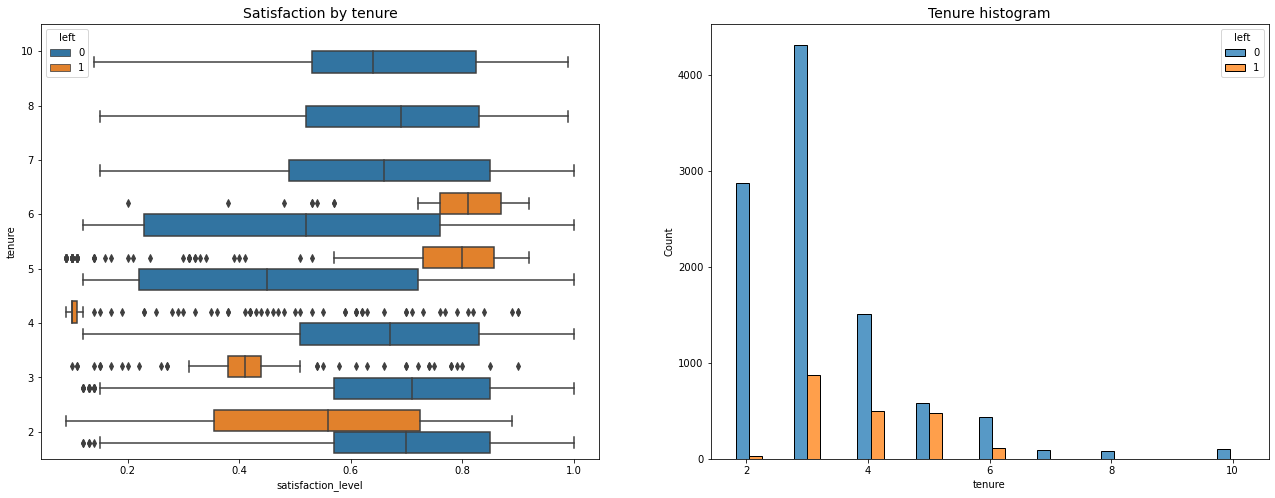

In [16]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Based on the box plot and the histogram above, four-year employees who left show a very low satisfaction level. This could be related to an event like a company policy change where the people affected weren't satisfied and should be further investigated. Also, the histogram shows that there are very few long-tenured employees. Employees who spend more than six years in the company usually do not leave.

In [17]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


After calculating the mean and median satisfaction scored of employees who left and who stayed, the results are as expected, the values of employees who left are lower than those who stayed. Satisfaction levels among the employees who stayed seems to be skewed to the left due to a lower mean satisfaction score than the median.

Next, I will explore the relationship between `average monthly hours` and getting a promotion in the last 5 years.

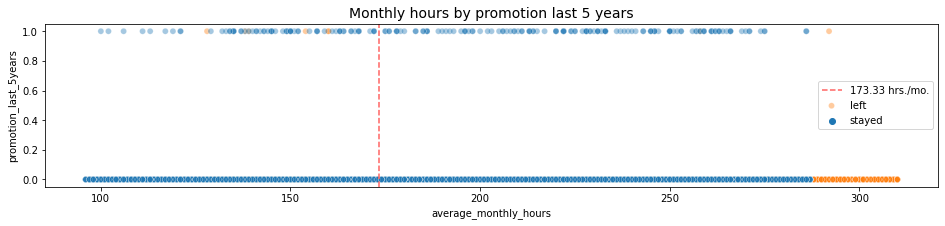

In [18]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=173.33, color='#ff6361', ls='--')
plt.legend(labels=['173.33 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The previous plot shows that most of the employees who were promoted in the last five years stayed in the company. Also, most of the employees who left the company worked the longest hours and very rarely got promoted.

Next, I will examine how the employees who left the company are distributed across departments.

In [19]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

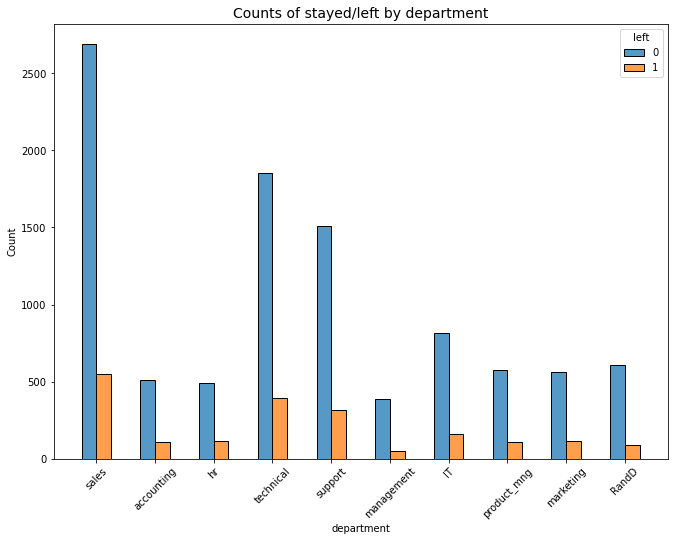

In [20]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

There is no significant difference in the distribution across departments based on the ratio of employees who stayed/left.

Finally, I will plot a heatmap to check for strong correlations between variables.

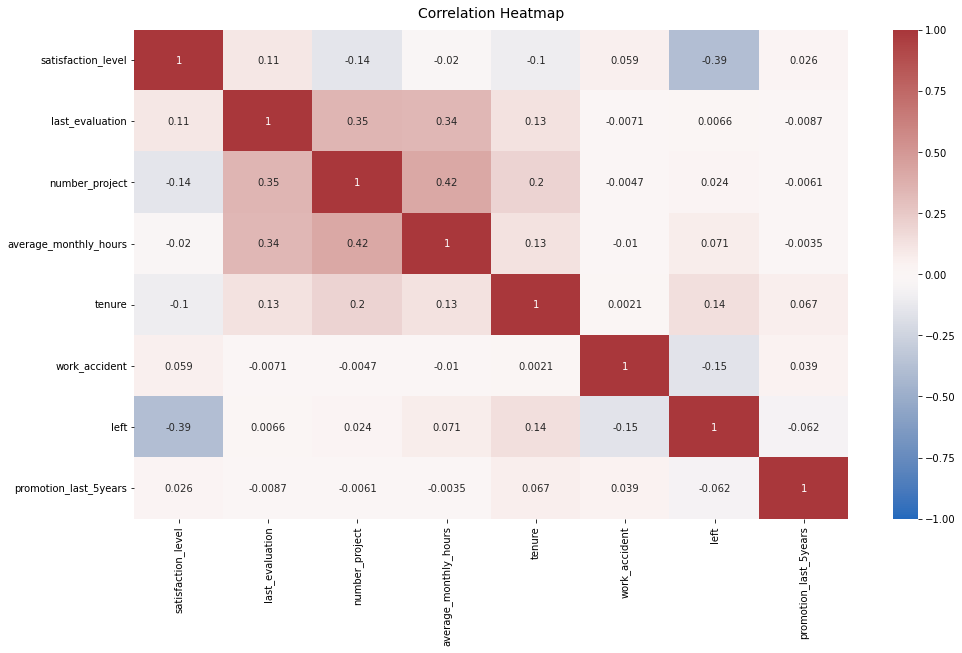

In [21]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap above indicates that the number of projects and average monthly hours have a positive correlation with each other. On the other hand, an employee leaving is negatively correlated to their satisfaction level. 

### EDA Conclusions

There is a correlation between high employee turnover and overwork due to factors such as high average monthly work hours and a large number of projects, which contributes to lower employee satisfaction levels. Employees who work the longest hours aren't receiving promotions. The data shows that most of the employees who were promoted in the last five years stayed in the company, and employees who spend more than six years at the company usually stay. Furthermore, there are very few long-tenured employees.

## PACE Stage: Construct

## Step 3. Model Building

### Identifying the type of prediction task.

The goal is to predict whether an employee leaves the company; consequently, this is a categorical outcome variable and requires binary classification. The outcome variable can be 1 or 0 depending if employee left or stayed. 

### Identifying the type of model most appropriate for this task.

Since we are trying to predict a categorical outcome variable with two possible outcomes, I will be using binomial logistic regression as it involves binary classification.

### Modeling: Logistic Regression Model

Before splitting the data, I will encode the two non-numeric variables `department` and `salary`. `department` is a categorical variable, meaning we can use dummy encoding for modeling. `salary` is categorical, but it's also ordinal; therefore it's better to convert the levels to numbers instead of dummy this column.

In [22]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Next, I will create a heatmap to visualize how variables are correlated.

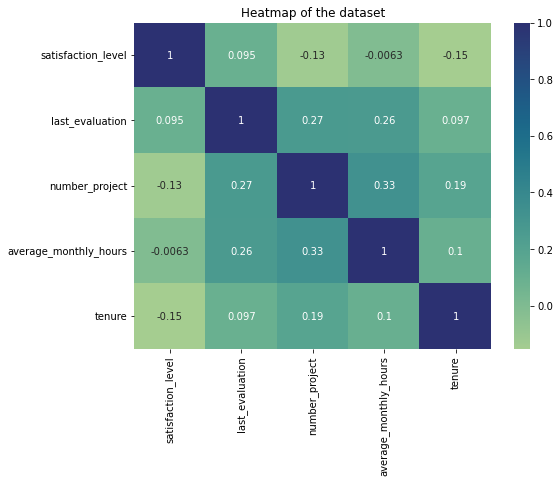

In [23]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Next, I will create a stacked bar plot, which will allow to visualize the number of employees across departments; comparing between the employees who stayed and the ones who left.

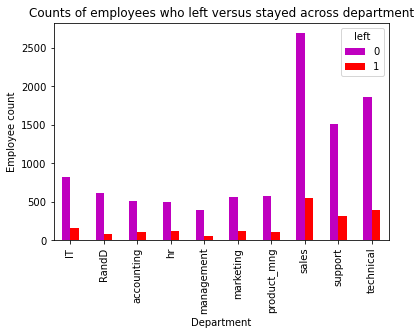

In [24]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Because logistic regression is sensitive to outliers, I will remove the outliers in the `tenure` column that was previously identified.

In [25]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Next, I will isolate the outcome variable `left`, which is the variable I want the model to predict.

In [26]:
# Isolate the outcome variable, left
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [27]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [29]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Below, I will test the logistic regression model to make predictions on the test set.

In [30]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Finally, I will create a confusion matrix in order to visualize the results of the logistic regression model.

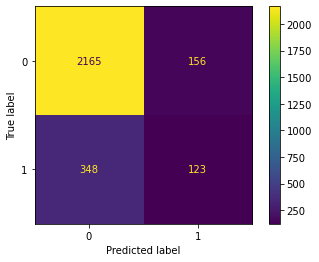

In [31]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The confusion matrix above shows the model metrics, each metric tells its own part of the story. The true negatives are displayed in the upper-left quadrant. The false positives are displayed in the upper-right quadrant. The false negatives are displayed in the bottom-left quadrant. The true positives are displayed in the bottom-right quadrant.

* True negatives: The number of people who did not leave that the model accurately predicted did not leave.

* False positives: The number of people who did not leave the model inaccurately predicted as leaving.

* False negatives: The number of people who left that the model inaccurately predicted did not leave

* True positives: The number of people who left the model accurately predicted as leaving

What stands out is that there are a lot of false negatives, the model misses 348 employees who would leave. The perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Next, I will check the class balance in the data by checking the value counts in the `left` column. The class balance informs how you interpret accuracy, because this is a binary classification task.

In [32]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The class balance shows an approximate 83%-17% split, indicating a slight imbalance. In this scenario, the data can be utilized as is for model evaluation without adjusting the class balance. However, in cases of more pronounces class imbalances, resampling techniques may be necessary to achieve a more balanced representation of the classes.

Lastly, in order to evaluate the performance of the logistic regression model, I will create a classification report that includes accuracy, precision, recall, and f1-score.

In [33]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The previous classification report indicates weighted averages of 79% precision, 82% recall, 80% f-1 score, and an accuracy of 82% for the logistic regression model. However, if the primary concern is accurately predicting employee turnover, these scores are noticeably lower.

## PACE Stage: Execute

## Step 4. Results and Evaluation

### Summary of the model results

The logistic regression model on the test set achieved weighted averages of 79% precision, 82% recall, 80% f-1 score, and an accuracy of 82%.

### Conclusion & Recommendations

The model confirms that the high turnover is correlated with employees being overworked at the company.

To enhance employee satisfaction and ensure employee retention, the following recommendations could be proposed to the stakeholders:

* Consider implementing a rewards system to recognize and incentivize employees who consistently put in long hours to support the organization's objectives.
* Limit the number of projects assigned to employees and set clear workload expectations.
* Explore the possibility of promoting employees who have completed a minimum of four years in the company, and carry out a more in-depth investigation into dissatisfaction among employees with a tenure of four years.
* Consider redistributing workload among existing employees or hire additional staff to ensure a more balanced workload.
* Foster a work-life balance culture by encouraging employees to take regular breaks and vacations to avoid burnout.